In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("animals_info.csv") 
df.head(1)

,Name,Kingdom,Phylum,Subphylum,Class,Order,Suborder,Family,Genus,Species,...,Top speed,Weight,Height,Length,Attributes,Distribution,Habits,Diet,Mating_Habits,Population
0,Grey Wolf,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Canidae,Canis,Canis lupus,...,75 km/h,16-60 kg,80-85 cm,105-160 cm,"Nocturnal,Carnivore,Scavenger,Terrestrial,Curs...","{'Geography': {'Continents': 'Asia, Europe, No...","{'Group name': 'pack, route, rout', 'Lifestyle...","Carnivore,,Scavenger","{'Mating behavior': 'Monogamy', 'Reproduction ...","{'Population trend': 'Stable', 'Population sta..."


In [ ]:
df.columns

Index(['Name', 'Kingdom', 'Phylum', 'Subphylum', 'Class', 'Order', 'Suborder',
       'Family', 'Genus', 'Species', 'Population size', 'Life span',
       'Top speed', 'Weight', 'Height', 'Length', 'Attributes', 'Distribution',
       'Habits', 'Diet', 'Mating_Habits', 'Population'],
      dtype='object')

DATA CLEANING

In [ ]:
#Every column is of categorical variable.
df

,Name,Kingdom,Phylum,Subphylum,Class,Order,Suborder,Family,Genus,Species,...,Top speed,Weight,Height,Length,Attributes,Distribution,Habits,Diet,Mating_Habits,Population
0,Grey Wolf,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Canidae,Canis,Canis lupus,...,75 km/h,16-60 kg,80-85 cm,105-160 cm,"Nocturnal,Carnivore,Scavenger,Terrestrial,Curs...","{'Geography': {'Continents': 'Asia, Europe, No...","{'Group name': 'pack, route, rout', 'Lifestyle...","Carnivore,,Scavenger","{'Mating behavior': 'Monogamy', 'Reproduction ...","{'Population trend': 'Stable', 'Population sta..."
1,Tiger,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Feliformia,Felidae,Panthera,Panthera tigris,...,96 km/h,65-306 kg,NaN,200-390 cm,"Nocturnal,Carnivore,Cursorial,Terrestrial,Ambu...","{'Geography': {'Continents': 'Asia', 'Subconti...","{'Lifestyle': 'Cursorial, Terrestrial, Ambush ...",Carnivore,"{'Mating behavior': 'Polygyny', 'Reproduction ...","{'Population trend': 'Decreasing', 'Population..."
2,Brown Bear,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Ursidae,Ursus,Ursus arctos,...,56 km/h,100-635 kg,70-153 cm,1.4-2.8 m,"Crepuscular,Omnivore,Terrestrial,Altricial,Nom...","{'Geography': {'Continents': 'Asia, Europe, No...","{'Group name': 'sloth, sleuth', 'Lifestyle': '...",Omnivore,"{'Mating behavior': 'Polygynandry,', 'Reproduc...","{'Population trend': 'Stable', 'Population sta..."
3,Blue Whale,Animalia,Chordata,Vertebrata,Mammalia,Artiodactyla,NaN,Balaenopteridae,Balaenoptera,Balaenoptera musculus,...,20 km/h,100-160 t,NaN,25-30 m,"Carnivore,Piscivores,Aquatic,Precocial,Natator...","{'Geography': {'Continents': 'Africa, South Am...","{'Group name': 'pod, gam, herd, school, mod', ...","Carnivore,,Piscivores","{'Mating behavior': 'Monogamy', 'Reproduction ...","{'Population trend': 'Increasing', 'Population..."
4,Killer Whale,Animalia,Chordata,Vertebrata,Mammalia,Artiodactyla,NaN,Delphinidae,Orcinus,Orcinus orca,...,45 km/h,3-6 t,NaN,6-9 m,"Diurnal,Carnivore,Aquatic,Precocial,Cosmopolit...","{'Geography': {'Continents': 'Africa, Oceania,...","{'Group name': 'pod, gam, herd, school, mod', ...",Carnivore,"{'Mating behavior': 'Polygynandry', 'Reproduct...",{'Population status': 'Data deficient (DD)'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29352,Sulphur-bearded reedhaunter,Animalia,Chordata,NaN,Aves,Passeriformes,NaN,Furnariidae,Cranioleuca,Limnoctites sulphuriferus,...,NaN,NaN,NaN,NaN,"Terrestrial,Migrating,starts with","{'Geography': {'Continents': 'South America', ...","{'Lifestyle': 'Terrestrial,', 'Seasonal behavi...",NaN,{},"{'Population trend': 'Decreasing', 'Population..."
29353,Jackson's pipit,African pipit,NaN,NaN,Animalia,Chordata,NaN,Aves,Passeriformes,Motacillidae,...,NaN,NaN,NaN,NaN,starts with,"{'Geography': {'Countries': ''}, 'Biome': [], ...",{},NaN,{},{}
29354,Gabon forest robin,Forest robin,NaN,NaN,Animalia,Chordata,NaN,Aves,Passeriformes,Muscicapidae,...,NaN,NaN,NaN,NaN,starts with,"{'Geography': {'Countries': ''}, 'Biome': [], ...",{},NaN,{},{}
29355,McConnell's spinetail,Animalia,Chordata,NaN,Aves,Passeriformes,NaN,Furnariidae,Synallaxis,Synallaxis macconnelli,...,NaN,NaN,NaN,NaN,"Terrestrial,Not a migrant,starts with","{'Geography': {'Continents': 'South America', ...",{},NaN,{},"{'Population trend': 'Stable', 'Population sta..."


In [ ]:
#Most of the animals belongs Animalia Kingdom
df['Kingdom'].value_counts()

Animalia                        28525
Grey Wolf                          41
Elk                                14
Brown Bear                         12
Red Deer                           10
                                ...  
Southern American Bushmaster        1
Italian Wall Lizard                 1
Lilford's wall lizard               1
Grass Snake                         1
African pipit                       1
Name: Kingdom, Length: 416, dtype: int64

In [ ]:
#dropping rows which have null values in Population size
idxc  = (df[df['Population size'].isnull()].index)
df1 = df.drop(index=idxc)
df1.isnull().sum()

Name                  0
Kingdom               0
Phylum               22
Subphylum           560
Class                 0
Order                 0
Suborder           1220
Family                0
Genus                 6
Species               0
Population size       0
Life span            98
Top speed          1245
Weight              177
Height             1492
Length               54
Attributes            0
Distribution          0
Habits                0
Diet                  4
Mating_Habits         0
Population            0
dtype: int64

In [ ]:
df1.reset_index(inplace=True)

Data Cleaning

Removing data from dictionaries and forming seperate columns

For pregnancy_duration

In [ ]:
Pregnancy_duration=[]
for i in range(len(df1['Mating_Habits'])):
  if 'Pregnancy duration' in eval(df1['Mating_Habits'][i]).keys():
    print(i)
    Pregnancy_duration.append(eval(df1['Mating_Habits'][i])['Pregnancy duration'])
  else:
    Pregnancy_duration.append('NaN')

0
1
2
3
4
5
6
7
8
9
10
11
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
236
237
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281

In [ ]:
df1['Pregnancy_duration']=Pregnancy_duration

In [ ]:
df1['Pregnancy_duration'][879]=df1['Pregnancy_duration'][879].replace('12.5','13')

In [ ]:
#need to convert everything into days 
#df1[df1['Pregnancy_duration'].str.contains('NaN')]
df1['Pregnancy_duration'][117]=df1['Pregnancy_duration'][117].replace(',','.')

In [ ]:
df1['Pregnancy_duration'][1031]=df1['Pregnancy_duration'][1031].replace('77.5','77')

In [ ]:
for i in range(len(df1['Pregnancy_duration'])):
  if 'to' in df1['Pregnancy_duration'][i]:
    df1['Pregnancy_duration'][i]=df1['Pregnancy_duration'][i].replace('to','-')

In [ ]:
#preganancy duration 
#year-8, days-579, months-325, NaN-831
for i in range(len(df1['Pregnancy_duration'])):
  if ('days' in df1['Pregnancy_duration'][i]):
    df1['Pregnancy_duration'][i]=df1['Pregnancy_duration'][i].strip('days').split('-')
  elif ('weeks' in df1['Pregnancy_duration'][i]):
    df1['Pregnancy_duration'][i]=[eval(i)*7 for i in df1['Pregnancy_duration'][i].strip('weeks').split('-')]
  elif ('months' in df1['Pregnancy_duration'][i]):
    df1['Pregnancy_duration'][i]=[(eval(i)*30) for i in df1['Pregnancy_duration'][i].strip('months').split('-')]
  elif ('year' in df1['Pregnancy_duration'][i]) or ('years' in df1['Pregnancy_duration'][i]):
    df1['Pregnancy_duration'][i]=[(eval(i)*365) for i in df1['Pregnancy_duration'][i].strip('year').strip('years').split('-')]
  else:
    df1['Pregnancy_duration'][i]='NaN'

In [ ]:
average_Pd=[]
for i in range(len(df1['Pregnancy_duration'])):
  for j in range(1):
    print(i,j)
    if len(df1['Pregnancy_duration'][i])>1 and ('NaN' not in df1['Pregnancy_duration'][i]) :
      average_Pd.append((int(df1['Pregnancy_duration'][i][j])+int(df1['Pregnancy_duration'][i][j+1]))//2)
    elif ('NaN' in df1['Pregnancy_duration'][i]):
      average_Pd.append(np.nan)
    else:
      average_Pd.append(int(df1['Pregnancy_duration'][i][j]))

In [ ]:
df1['average_pregnancy_duration']=average_Pd

In [ ]:
#.replace({0:np.nan},inplace=True)

In [ ]:
df1['average_pregnancy_duration'].isnull().sum()

For Diet

In [ ]:
df1['Diet'][575]=str(df1['Diet'][575])

<ipython-input-26-49ea4089de44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Diet'][575]=str(df1['Diet'][575])


In [ ]:
df1['Diet'][853]=str(df1['Diet'][853])

<ipython-input-27-af6b8c766bb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Diet'][853]=str(df1['Diet'][853])


In [ ]:
df1['Diet'][885]=str(df1['Diet'][885])

<ipython-input-28-65fad2ffc19a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Diet'][885]=str(df1['Diet'][885])


In [ ]:
df1['Diet'][1009]=str(df1['Diet'][1009])

<ipython-input-29-7b6ad0b6cc84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Diet'][1009]=str(df1['Diet'][1009])


In [ ]:
#diet for animals
diet=[]
for i in range(len((df1['Diet']))):
  print(i)
  if ('Carnivore' in df1['Diet'][i].split(',')) :
    diet.append('Carnivore')
  elif 'Omnivore' in df1['Diet'][i].split(','):
    diet.append('Omnivore')
  else:
    diet.append('Herbivore')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
 df1['diet']=diet

For Life span

In [ ]:
t=df1['Life span'].replace({'yrs':'','days':'','years':'','trs':'','above':'','over':'','mos':'','up':'','mo':''},regex=True)

In [ ]:
life_span=[]
for i in range(len(t)):
  if pd.notna(t[i]) :
    print(t[i])
    life_span.append(t[i].strip('yrs').split('-'))
  else:
    life_span.append('NaN')

In [ ]:
import math
for i in range(len(life_span)):
  for j in range(1):
    print(i,j)
    if (len(life_span[i])==2 and life_span[i]!='NaN') and (type(life_span[i][j])!= int or type(life_span[i][j+1])!= int) :
      if type(eval(life_span[i][j]))==float:
        life_span[i][j]=math.floor(eval(life_span[i][j]))
      elif type(eval(life_span[i][j+1]))==float:
        life_span[i][j+1]=math.floor(eval(life_span[i][j+1]))

In [ ]:
life_span[773][1]=math.floor(eval(life_span[773][1]))

In [ ]:
life_span[819][1]=math.floor(eval(life_span[819][1]))

In [ ]:
average_ls=[]
for i in range(len(life_span)):
  for j in range(1):
    print(i,j)
    if len(life_span[i])==2 :
      average_ls.append((int(life_span[i][j])+int(life_span[i][j+1]))//2)
    elif (life_span[i]==1) and (len(life_span[i][j])<2):
      average_ls.append(int(life_span[i][j]))
    else:
      average_ls.append(np.nan)

In [ ]:
df1['average_life_span']=average_ls

For Population_status

In [ ]:
population_status=[]
for i in range(len(df1['Population'])):
  if 'Population status' in eval(df1['Population'][i]).keys():
    population_status.append(eval(df1['Population'][i])['Population status'])
  else:
    population_status.append(np.nan)

In [ ]:
df1['population status']=population_status

For Population_trend

In [ ]:
population_trend=[]
for i in range(len(df1['Population'])):
  if 'Population trend' in eval(df1['Population'][i]).keys():
    population_trend.append(eval(df1['Population'][i])['Population trend'])
    print(population_trend)
  else:
    population_trend.append(np.nan)

In [ ]:
df1['population trend']=population_trend

For Getting Regions

In [ ]:
# getting regions from the dictonary
regions1=[]
for i in range(len(df1['Distribution'])):
  if 'Countries' in eval(df1['Distribution'][i])['Geography'].keys():
    regions1.append(eval(df1['Distribution'][i])['Geography']['Countries'])
  else:
    regions1.append([])
print(regions1)

['Albania, Armenia, Azerbaijan, Belarus, Bhutan, Bosnia and Herzegovina, Bulgaria, Canada, China, Croatia,', 'Bangladesh, Bhutan, China,   India, Indonesia, Laos, Malaysia, Myanmar, Nepal, Russia,', 'Albania, Armenia, Austria, Azerbaijan, Belarus, Bosnia and Herzegovina, Bulgaria, Canada, China, Croatia,', 'Angola, Argentina, Australia, Bahamas, Bangladesh, Benin, Brazil, Cameroon, Canada, Cape Verde,', 'Algeria, Antigua and Barbuda, Argentina, Australia, Bahamas, Bangladesh, Barbados, Belize, Benin, Brazil,', 'China', 'Angola, Benin, Botswana, Burkina Faso, Cameroon, Central African Republic, Chad, DR Congo, Ethiopia, India,', 'Australia', 'Argentina, Belize, Bolivia, Brazil, Canada, Chile, Colombia, Costa Rica, Ecuador,  El Salvador,', 'Australia', 'Argentina, Belize, Bolivia, Brazil, Colombia, Costa Rica, Ecuador, Guatemala, Guyana, Honduras,', 'Belize, Canada, Costa Rica, El Salvador,  Guatemala, Honduras, Mexico, Nicaragua, Panama, United States', 'Canada, Norway, Russia, United S

In [ ]:
#count of regions
count_regions=[]
for i in range(len(regions1)):
  if regions1[i] != []:
    count_regions.append(len(regions1[i].split(',')))
  else:
    count_regions.append(0)

In [ ]:
df1['no_regions']=count_regions

In [ ]:
import scipy.stats as stats

In [ ]:
df1['population status']=df1['population status'].replace({'Near Threatened (NT)':'Vulnerable (VU)','Critically endangered (CR)':'Endangered (EN)',np.nan:'Data deficient (DD)','Not evaluated (NE)':'Data deficient (DD)'})

In [ ]:
set(df1['population trend'])

{'Decreasing', 'Increasing', 'Stable', 'Unknown', nan}

In [ ]:
df1['population trend']=df1['population trend'].replace({np.nan:'Unknown'})

In [ ]:
set(df1['population status'])

{'Data deficient (DD)',
 'Endangered (EN)',
 'Extinct in the wild (EW)',
 'Least concern (LC)',
 'Vulnerable (VU)'}

In [ ]:
tab=pd.crosstab(df1['population trend'],df1['population status'])
print(tab)

population status  Data deficient (DD)  Endangered (EN)  \
population trend                                          
Decreasing                          13              214   
Increasing                           3               16   
Stable                               0               11   
Unknown                             86               12   

population status  Extinct in the wild (EW)  Least concern (LC)  \
population trend                                                  
Decreasing                                0                 286   
Increasing                                0                 169   
Stable                                    0                 501   
Unknown                                   2                 147   

population status  Vulnerable (VU)  
population trend                    
Decreasing                     274  
Increasing                      19  
Stable                          27  
Unknown                         26  


In [ ]:
o=tab.values

In [ ]:
print(o)

[[ 13 214   0 286 274]
 [  3  16   0 169  19]
 [  0  11   0 501  27]
 [ 86  12   2 147  26]]


In [ ]:
val=stats.chi2_contingency(tab)

In [ ]:
e=val[3]


In [ ]:
print(e)

[[4.44485050e+01 1.10249723e+02 8.71539313e-01 4.80653931e+02
  1.50776301e+02]
 [1.16910299e+01 2.89983389e+01 2.29235880e-01 1.26423588e+02
  3.96578073e+01]
 [3.04418605e+01 7.55077519e+01 5.96899225e-01 3.29189922e+02
  1.03263566e+02]
 [1.54186047e+01 3.82441860e+01 3.02325581e-01 1.66732558e+02
  5.23023256e+01]]


In [ ]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(o,e)])
chi_square_statistic=chi_square[0]+chi_square[1]


In [ ]:
print('chi square score:',chi_square_statistic)

chi square score: 558.8323325306956


In [ ]:
crtical_value=chi2.ppf(q=1-0.05,df=12)
print('crtical_value',crtical_value)

crtical_value 21.02606981748307


No relation between Genus and population Trend

In [ ]:
eval(df['Mating_Habits'][0])

{'Mating behavior': 'Monogamy',
 'Reproduction season': 'January-April',
 'Pregnancy duration': '60-63 days',
 'Baby carrying': '1-14 pups',
 'Independent age': '45 days',
 'Female name': 'bitch',
 'Male name': 'dog',
 'Baby name': 'pup, whelp'}

For Getting Mating behaviour

In [ ]:
mating_beh=[]
for i in range(len(df1['Mating_Habits'])):
  if 'Mating behavior' in eval(df1['Mating_Habits'][i]).keys():
    mating_beh.append(eval(df1['Mating_Habits'][i])['Mating behavior'])
  else:
    mating_beh.append(np.nan)

In [ ]:
mating_beh

['Monogamy',
 'Polygyny',
 'Polygynandry,',
 'Monogamy',
 'Polygynandry',
 'Polygyny',
 'Polygyny',
 'Polygyny',
 'Polygyny',
 'Polygynandry',
 'Polygyny',
 'Polygynandry',
 'Polygyny',
 'Polygyny',
 'Polygynandry',
 'Monogamy',
 'Polygynandry',
 'Polygyny',
 'Polygyny',
 'Polygyny',
 'Polygynandry',
 'Monogamy',
 'Polygyny',
 'Polygynandry',
 nan,
 'Polygyny',
 'Polygyny',
 'Polygyny',
 'Polygynandry',
 'Polygyny',
 'Polygyny',
 'Polygyny',
 'Monogamy',
 'Polygyny',
 'Polygyny',
 'Monogamy',
 'Polygyny',
 'Monogamy,',
 'Monogamy',
 nan,
 'Polygyny',
 'Polygyny',
 'Polygyny',
 'Polygyny',
 'Polygyny',
 'Polygyny',
 'Polygyny',
 nan,
 'Polygyny',
 'Polygyny',
 'Polygynandry',
 'Monogamy',
 'Monogamy',
 'Polygynandry',
 'Polygyny',
 'Polygynandry',
 'Polygamy',
 'Polygyny',
 'Polygyny',
 nan,
 'Polygyny',
 'Polygyny',
 'Polygyny',
 'Polyandry',
 'Polygyny',
 'Monogamy',
 'Polygyny',
 'Monogamy',
 'Polygyny',
 'Polygyny',
 'Polygyny',
 'Polyandry',
 nan,
 'Polyandry',
 'Polygyny',
 nan,
 

In [ ]:
df1['Mating_beh']=mating_beh

In [ ]:
df1['Mating_beh'].value_counts()

Monogamy            495
Polygyny            417
Polygynandry        158
Serial monogamy      79
Polyandry            30
Polygyny,            30
Monogamy,            28
Serial monogamy,      5
Polygamy              4
Polygynandry,         3
Polyandry,            2
Name: Mating_beh, dtype: int64

In [ ]:
df.isnull().sum()

Name                   0
Kingdom                0
Phylum               832
Subphylum          18605
Class                  0
Order                437
Suborder           26397
Family                 3
Genus                  6
Species                0
Population size    27551
Life span          27495
Top speed          28762
Weight             26484
Height             29021
Length             26410
Attributes             0
Distribution           0
Habits                 0
Diet               26713
Mating_Habits          0
Population             0
dtype: int64

Exploratory data analysis

<Axes: >

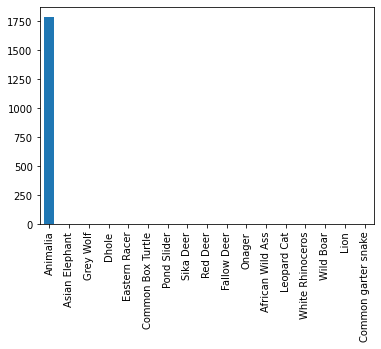

In [ ]:
#most of the animals belongs to animalia
df1['Kingdom'].value_counts().plot(kind='bar')

Most of animals belongs to classs mammalia

<Axes: >

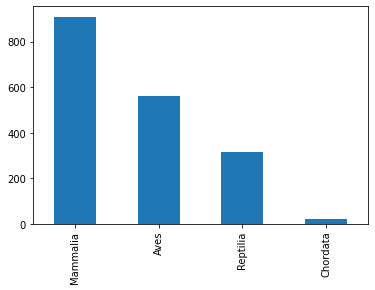

In [ ]:
df1['Class'].value_counts().plot(kind='bar')

Most Of the animals Take their diet as carnivore

<Axes: >

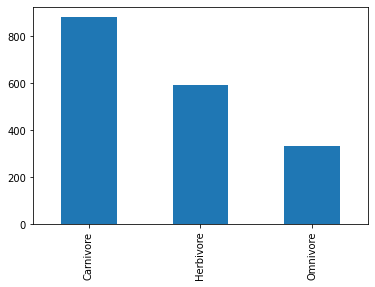

In [ ]:
df1['diet'].value_counts().plot(kind='bar')

There are some outliers in the average_pregannacy_duration

<Axes: >

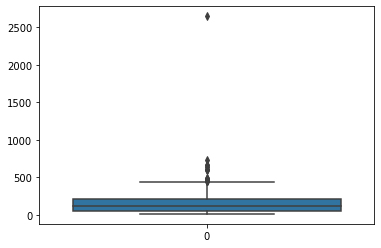

In [ ]:
sns.boxplot(df1['average_pregnancy_duration'])

[Text(0.5, 1.0, 'average_life_span before imputation')]

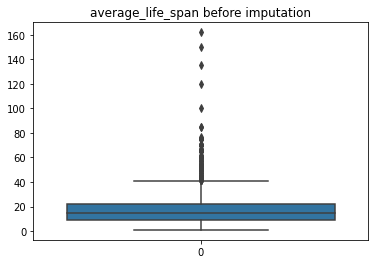

In [ ]:
sns.boxplot(df1['average_life_span']).set(title='average_life_span before imputation')

[Text(0.5, 1.0, 'average_life_span after imputation')]

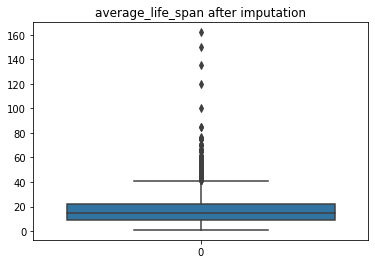

In [ ]:
sns.boxplot(df1['average_life_span']).set(title='average_life_span after imputation')

In [ ]:
df1['average_life_span'][df1['average_life_span'].isnull()]=df1['average_life_span'].dropna().sample(df1['average_life_span'].isnull().sum()).values

<ipython-input-73-15ac02bf9624>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['average_life_span'][df1['average_life_span'].isnull()]=df1['average_life_span'].dropna().sample(df1['average_life_span'].isnull().sum()).values


In [ ]:
pd.crosstab(df1['Class'],df1['population trend'])

population trend,Decreasing,Increasing,Stable,Unknown
Class,,,,
Aves,262,145,133,20
Chordata,6,3,4,9
Mammalia,457,54,259,139
Reptilia,62,5,143,105


In [ ]:
#pt-279,ps-9
set(df1['population status'])

{'Data deficient (DD)',
 'Endangered (EN)',
 'Extinct in the wild (EW)',
 'Least concern (LC)',
 'Vulnerable (VU)'}

In [ ]:
df1['population status'].replace({})

0        Least concern (LC)
1           Endangered (EN)
2        Least concern (LC)
3           Endangered (EN)
4       Data deficient (DD)
               ...         
1801        Vulnerable (VU)
1802        Vulnerable (VU)
1803     Least concern (LC)
1804     Least concern (LC)
1805     Least concern (LC)
Name: population status, Length: 1806, dtype: object

In [ ]:
df1['population status'].value_counts()

Least concern (LC)          1103
Vulnerable (VU)              346
Endangered (EN)              253
Data deficient (DD)          102
Extinct in the wild (EW)       2
Name: population status, dtype: int64

In [ ]:
df['population trend']=df1['population trend'].fillna(value='Unknown')

In [ ]:
df1['population status']=df1['population status'].replace({'Near Threatened (NT)':'Vulnerable (VU)','Critically endangered (CR)':'Endangered (EN)','NaN':'Data deficient (DD)','Not evaluated (NE)':'Data deficient (DD)'})

In [ ]:
df1['population status'].value_counts()

Least concern (LC)          1103
Vulnerable (VU)              346
Endangered (EN)              253
Data deficient (DD)          102
Extinct in the wild (EW)       2
Name: population status, dtype: int64

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
from numpy.core.numeric import cross
# Observed values
cross_Tab = pd.crosstab(df1['diet'],df1['population status'])
observed_values = cross_Tab.values
#print(observed_values)
print("Observed values \n", cross_Tab)

Observed values 
 population status  Data deficient (DD)  Endangered (EN)  \
diet                                                      
Carnivore                           73               77   
Herbivore                           22              131   
Omnivore                             7               45   

population status  Extinct in the wild (EW)  Least concern (LC)  \
diet                                                              
Carnivore                                 0                 581   
Herbivore                                 2                 292   
Omnivore                                  0                 230   

population status  Vulnerable (VU)  
diet                                
Carnivore                      150  
Herbivore                      144  
Omnivore                        52  


In [ ]:
val = chi2_contingency(cross_Tab)
print(val)

Chi2ContingencyResult(statistic=104.5203740915844, pvalue=5.072368053910731e-19, dof=8, expected_freq=array([[4.97574751e+01, 1.23418051e+02, 9.75636766e-01, 5.38063677e+02,
        1.68785161e+02],
       [3.33787375e+01, 8.27923588e+01, 6.54485050e-01, 3.60948505e+02,
        1.13225914e+02],
       [1.88637874e+01, 4.67895903e+01, 3.69878184e-01, 2.03987818e+02,
        6.39889258e+01]]))


In [ ]:
expected_Values = val[3]
expected_Values

array([[4.97574751e+01, 1.23418051e+02, 9.75636766e-01, 5.38063677e+02,
        1.68785161e+02],
       [3.33787375e+01, 8.27923588e+01, 6.54485050e-01, 3.60948505e+02,
        1.13225914e+02],
       [1.88637874e+01, 4.67895903e+01, 3.69878184e-01, 2.03987818e+02,
        6.39889258e+01]])

In [ ]:
from scipy.stats import chi2 
chi_sqaure = sum([(o-e)**2/e for o,e in zip(observed_values,expected_Values)])
critical_val = chi2.ppf(q=1-0.05, df=8)
p_value = 1- chi2.cdf(x=(chi_sqaure[0]+chi_sqaure[1]),df=8)
print(" \n Chi-square stat \n", chi_sqaure[0]+chi_sqaure[1])
print("\n Critical Value \n",critical_val)
print('\n p-value \n', p_value)
print('\n Significance level \n', 0.05)

 
 Chi-square stat 
 67.79371863123465

 Critical Value 
 15.50731305586545

 p-value 
 1.3492096329059677e-11

 Significance level 
 0.05


Removing outliers in lifespan column using Z-score method

In [ ]:
from sklearn.impute import SimpleImputer
x_head=df1[['average_life_span']]
SI = SimpleImputer(strategy='median')
x_trf = SI.fit_transform(x_head)
df1['lifespan_Imp'] = pd.DataFrame(x_trf,columns=x_head.columns)

<Axes: >

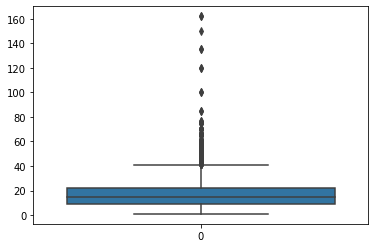

In [ ]:
sns.boxplot(df1['lifespan_Imp'])

In [ ]:
per_25=df1['lifespan_Imp'].quantile(0.25)
per_75=df1['lifespan_Imp'].quantile(0.75)

In [ ]:
iqr=per_75-per_25

In [ ]:
upper=per_75 + 1.5*iqr
lower=per_25 - 1.5*iqr


In [ ]:
plt.figure(figsize=(10,8))
plt.title('Classification of groups in the response variables')
df1['population trend'].value_counts().plot(kind='bar')

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Classification of groups in the response variables')
df1['population status'].value_counts().plot(kind='bar')

In [ ]:
new_df=df1.copy()
new_df['lifespan_Imp']=np.where(new_df['lifespan_Imp']>upper,upper,np.where(new_df['lifespan_Imp']<lower,lower,new_df['lifespan_Imp']))

This new dataset after cleaning from the above dataset

In [ ]:
new_df

,index,Name,Kingdom,Phylum,Subphylum,Class,Order,Suborder,Family,Genus,...,Population,Pregnancy_duration,average_pregnancy_duration,diet,average_life_span,population status,population trend,no_regions,Mating_beh,lifespan_Imp
0,0,Grey Wolf,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Canidae,Canis,...,"{'Population trend': 'Stable', 'Population sta...","[60, 63 ]",61.0,Carnivore,15.0,Least concern (LC),Stable,11,Monogamy,15.0
1,1,Tiger,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Feliformia,Felidae,Panthera,...,"{'Population trend': 'Decreasing', 'Population...",[103 ],103.0,Carnivore,12.0,Endangered (EN),Decreasing,11,Polygyny,12.0
2,2,Brown Bear,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Ursidae,Ursus,...,"{'Population trend': 'Stable', 'Population sta...",[56],56.0,Omnivore,35.0,Least concern (LC),Stable,11,"Polygynandry,",35.0
3,3,Blue Whale,Animalia,Chordata,Vertebrata,Mammalia,Artiodactyla,NaN,Balaenopteridae,Balaenoptera,...,"{'Population trend': 'Increasing', 'Population...",[365],365.0,Carnivore,85.0,Endangered (EN),Increasing,11,Monogamy,41.5
4,4,Killer Whale,Animalia,Chordata,Vertebrata,Mammalia,Artiodactyla,NaN,Delphinidae,Orcinus,...,{'Population status': 'Data deficient (DD)'},"[450, 540]",495.0,Carnivore,65.0,Data deficient (DD),Unknown,11,Polygynandry,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,21645,Brown Teal,Animalia,Chordata,NaN,Aves,Anseriformes,NaN,Anatidae,Anas,...,"{'Population trend': 'Increasing', 'Population...",NaN,NaN,Omnivore,8.0,Vulnerable (VU),Increasing,1,Monogamy,8.0
1802,21710,Blue Swallow,Animalia,Chordata,NaN,Aves,Passeriformes,NaN,Hirundinidae,Hirundo,...,"{'Population trend': 'Decreasing', 'Population...",NaN,NaN,Carnivore,20.0,Vulnerable (VU),Decreasing,9,NaN,20.0
1803,22076,Blue-Crowned Motmot,Animalia,Chordata,NaN,Aves,Coraciiformes,NaN,Momotidae,Momotus,...,"{'Population trend': 'Decreasing', 'Population...",NaN,NaN,Carnivore,45.0,Least concern (LC),Decreasing,1,Monogamy,41.5
1804,22447,Crested Bellbird,Animalia,Chordata,NaN,Aves,Passeriformes,NaN,Oreoicidae,Oreoica,...,"{'Population trend': 'Decreasing', 'Population...",NaN,NaN,Herbivore,10.0,Least concern (LC),Decreasing,1,Serial monogamy,10.0


<Axes: >

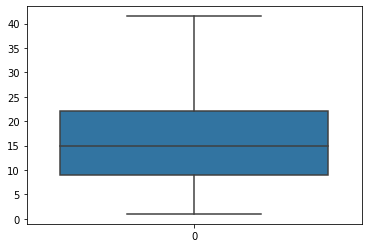

In [ ]:
sns.boxplot(new_df['lifespan_Imp'])

In [ ]:
new_df['lifespan_Imp']

0       15.0
1       12.0
2       35.0
3       41.5
4       41.5
        ... 
1801     8.0
1802    20.0
1803    41.5
1804    10.0
1805     2.0
Name: lifespan_Imp, Length: 1806, dtype: float64

<Axes: >

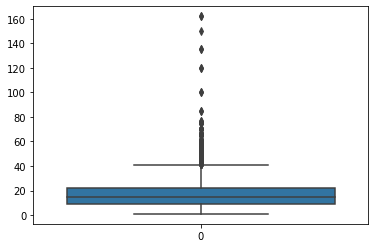

In [ ]:
sns.boxplot(df1['lifespan_Imp'])

In [ ]:
df1.columns

In [ ]:
final_df=new_df[['average_pregnancy_duration', 'diet',
       'average_life_span', 'population status', 'population trend',
       'no_regions', 'lifespan_Imp']]

In [ ]:
final_df['average_pregnancy_duration']

0        61.0
1       103.0
2        56.0
3       365.0
4       495.0
        ...  
1801      NaN
1802      NaN
1803      NaN
1804      NaN
1805      NaN
Name: average_pregnancy_duration, Length: 1806, dtype: float64

In [ ]:
final_df['average_pregnancy_duration'][final_df['average_pregnancy_duration'].isnull()]=final_df['average_pregnancy_duration'].dropna().sample(final_df['average_pregnancy_duration'].isnull().sum()).values

<ipython-input-108-9e25bcf0d706>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['average_pregnancy_duration'][final_df['average_pregnancy_duration'].isnull()]=final_df['average_pregnancy_duration'].dropna().sample(final_df['average_pregnancy_duration'].isnull().sum()).values


In [ ]:
final_df['average_pregnancy_duration']=final_df['average_pregnancy_duration'].astype(int)

<ipython-input-109-f2112df15910>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['average_pregnancy_duration']=final_df['average_pregnancy_duration'].astype(int)


In [ ]:
final_df

,average_pregnancy_duration,diet,average_life_span,population status,population trend,no_regions,lifespan_Imp
0,61,Carnivore,15.0,Least concern (LC),Stable,11,15.0
1,103,Carnivore,12.0,Endangered (EN),Decreasing,11,12.0
2,56,Omnivore,35.0,Least concern (LC),Stable,11,35.0
3,365,Carnivore,85.0,Endangered (EN),Increasing,11,41.5
4,495,Carnivore,65.0,Data deficient (DD),Unknown,11,41.5
...,...,...,...,...,...,...,...
1801,190,Omnivore,8.0,Vulnerable (VU),Increasing,1,8.0
1802,27,Carnivore,20.0,Vulnerable (VU),Decreasing,9,20.0
1803,33,Carnivore,45.0,Least concern (LC),Decreasing,1,41.5
1804,180,Herbivore,10.0,Least concern (LC),Decreasing,1,10.0


In [ ]:
final_df['lifespan_Imp']=final_df['lifespan_Imp'].astype(int)

<ipython-input-111-65ca52a2e25c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['lifespan_Imp']=final_df['lifespan_Imp'].astype(int)


In [ ]:
final_df['average_life_span']=final_df['average_life_span'].astype(int)

<ipython-input-112-027aad7dc613>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['average_life_span']=final_df['average_life_span'].astype(int)


In [ ]:
final_df['population status'].value_counts()

Least concern (LC)          1103
Vulnerable (VU)              346
Endangered (EN)              253
Data deficient (DD)          102
Extinct in the wild (EW)       2
Name: population status, dtype: int64

In [ ]:
labels = {'Unknown':0,'Stable':2,'Decreasing':3,'Increasing':1}
final_df['Pop_Trend1'] = final_df['population trend'].map(labels)

<ipython-input-114-20d10f8f07da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Pop_Trend1'] = final_df['population trend'].map(labels)


In [ ]:
final_df=pd.get_dummies(final_df,columns=['diet'],drop_first=True)

In [ ]:
df2=final_df.drop(columns=['population trend','average_life_span'],axis=1)

In [ ]:
df2

,average_pregnancy_duration,population status,no_regions,lifespan_Imp,Pop_Trend1,diet_Herbivore,diet_Omnivore
0,61,Least concern (LC),11,15,2,0,0
1,103,Endangered (EN),11,12,3,0,0
2,56,Least concern (LC),11,35,2,0,1
3,365,Endangered (EN),11,41,1,0,0
4,495,Data deficient (DD),11,41,0,0,0
...,...,...,...,...,...,...,...
1801,190,Vulnerable (VU),1,8,1,0,1
1802,27,Vulnerable (VU),9,20,3,0,0
1803,33,Least concern (LC),1,41,3,0,0
1804,180,Least concern (LC),1,10,3,1,0


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
x=df2.loc[:,['average_pregnancy_duration','no_regions','lifespan_Imp','Pop_Trend1','diet_Herbivore','diet_Omnivore']]

In [ ]:
y=df2.loc[:,'population status']

In [ ]:
from pandas.core.groupby.groupby import final
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
Y_train

1413        Vulnerable (VU)
1123     Least concern (LC)
512      Least concern (LC)
840         Vulnerable (VU)
1589     Least concern (LC)
               ...         
264      Least concern (LC)
142      Least concern (LC)
1556        Vulnerable (VU)
355     Data deficient (DD)
543         Vulnerable (VU)
Name: population status, Length: 1444, dtype: object